# Cartopy Relief Mapping
----------------------------

## Introduction ##
This notebook contains examples of different colormaps for land relief shading.  The color maps used have no water-appropriate component, so underwater elements of the map will be shaded a contant color.
The elevation data we use is Shuttle Radar Topography Mission (SRTM) data, downloaded from the ESA (European Space Agency)

### Import required packages

This will cause an error message to be displayed, concerning SRTM access.  We ignore this, as we are using ESA datastores.

In [4]:
import cartopy.crs as ccrs
import cartopy.io as cio
import cartopy.io.srtm as cis
from cartopy.io.srtm import SRTM3Source
from cartopy.io.srtm import SRTM1Source
from cartopy.io.srtm import SRTMDownloader

import matplotlib.pyplot as plt
import matplotlib.colors

import numpy as np

import os

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


In [5]:
%matplotlib inline

---------------------------
## Example of 'terrain' color map

This example shows the result of shading an array of 100 values, 10 of which are 'underwater' (ie -ve)

The 'terrain' colormap has a section in blue, that gets used even though not appropriate for this all-land example.  Using `vmin` and `vmax`, we limit the application of the color map to elevation values betweem 0 and 80, and specify the colors to use for the values outside this range.

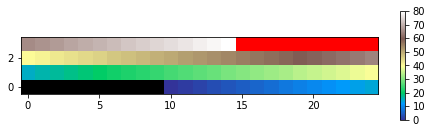

In [4]:
# create array with values from 0 to 99, in 4 rows of 25 values, and display with terrain colormap
arr = np.linspace(0, 100, 100).reshape((4, 25))

# create some -ve values
arr = arr - 10

fig = plt.figure(figsize=(8,8))
my_cmap = plt.cm.get_cmap('terrain')
my_cmap.set_under('black')
my_cmap.set_over('red')

mapable = plt.imshow(arr,  cmap=my_cmap, origin='lower', vmin=0, vmax=80)# vmin=0.5, vmax=90)

fig.colorbar(mapable,  shrink=.25)

plt.show()

---------------------------
## Color Palette Table Loader ##

This is a slight variant of the utility to convert Color Palette Tables; taken from

http://scipy-cookbook.readthedocs.io/items/Matplotlib_Loading_a_colormap_dynamically.html



In [6]:
def get_cpt_cmap(fileName,Path = None):
    '''
    get_cpt_map: generate a color dict from a MATLAB-like CPT file
    
    Parameters:
    filename: String: the name of the file holding the CPT in text form.
              The filename supplied will have the extension ".cpt" added
              No default.
              
    Path: String: the path to the file to be processed, if not included in the 
    filename parameter. Defaults to None
    
    Returns:
    A color map dict, that can be used to create a matplotlib colormap
    
    Design:  refer to
    
    http://scipy-cookbook.readthedocs.io/items/Matplotlib_Loading_a_colormap_dynamically.html
    
    Limitations:
    Note that some CPT files in the wild have color specied by name (eg 'blue'), rather than a RGB tuple.
    This is NOT catered for.
    '''
    import colorsys

    if type(Path) == type(None):
      filePath = "/usr/local/cmaps/"+ fileName+".cpt"
    else:
      filePath = Path+"/"+ fileName +".cpt"
    #end if
    try:
      f = open(filePath)
    except:
      print ("file ",filePath, "not found")
      return None
    #end try

    lines = f.readlines()
    f.close()

    x = []
    r = []
    g = []
    b = []
    colorModel = "RGB"
    for l in lines:
      ls = l.split()
      if l[0] == "#":
         if ls[-1] == "HSV":
             colorModel = "HSV"
             continue
         else:
             continue
         #end if
      #end if
      if ls[0] == "B" or ls[0] == "F" or ls[0] == "N":
         pass
      else:
          x.append(float(ls[0]))
          r.append(float(ls[1]))
          g.append(float(ls[2]))
          b.append(float(ls[3]))
          xtemp = float(ls[4])
          rtemp = float(ls[5])
          gtemp = float(ls[6])
          btemp = float(ls[7])
      #end if
    #end for
    x.append(xtemp)
    r.append(rtemp)
    g.append(gtemp)
    b.append(btemp)

    nTable = len(r)
    x = np.array( x, np.float_)
    r = np.array( r , np.float_)
    g = np.array( g , np.float_)
    b = np.array( b , np.float_)
    if colorModel == "HSV":
     for i in range(r.shape[0]):
         rr,gg,bb = colorsys.hsv_to_rgb(r[i]/360.,g[i],b[i])
         r[i] = rr ; g[i] = gg ; b[i] = bb
    if colorModel == "HSV":
         for i in range(r.shape[0]):
             rr,gg,bb = colorsys.hsv_to_rgb(r[i]/360.,g[i],b[i])
             r[i] = rr ; g[i] = gg ; b[i] = bb
        #end for
    #end if
    if colorModel == "RGB":
          r = r/255.
          g = g/255.
          b = b/255.
    #end if
    xNorm = (x - x[0])/(x[-1] - x[0])

    red = []
    blue = []
    green = []
    for i in range(len(x)):
          red.append([xNorm[i],r[i],r[i]])
          green.append([xNorm[i],g[i],g[i]])
          blue.append([xNorm[i],b[i],b[i]])
    #end for
    colorDict = {"red":red, "green":green, "blue":blue}
    return (colorDict)
# end get_cpt_cmap

------------------------
## CPT-CITY

The website http://soliton.vm.bytemark.co.uk/pub/cpt-city/ contains a large number
of color gradients, some of which are appropriate for land relief shading



### DEM_Screen
A design for Digital Elevation Models screen display.

We will process the CPT files downloaded from this site, and display using our array of -10 to 90.  We then display our SRTM data using the colormap.

In [6]:
fname = 'DEM_Screen'
cpt_path = 'd:/water/cpt-data/td'

dem_dict = get_cpt_cmap(fname, cpt_path)

In [7]:
print(dem_dict)

{'red': [[0.0, 0.0, 0.0], [0.125, 0.2, 0.2], [0.25, 0.9568627450980393, 0.9568627450980393], [0.5, 0.9568627450980393, 0.9568627450980393], [0.75, 0.6, 0.6], [1.0, 1.0, 1.0]], 'green': [[0.0, 0.5176470588235295, 0.5176470588235295], [0.125, 0.8, 0.8], [0.25, 0.9411764705882353, 0.9411764705882353], [0.5, 0.7411764705882353, 0.7411764705882353], [0.75, 0.39215686274509803, 0.39215686274509803], [1.0, 1.0, 1.0]], 'blue': [[0.0, 0.20784313725490197, 0.20784313725490197], [0.125, 0.0, 0.0], [0.25, 0.44313725490196076, 0.44313725490196076], [0.5, 0.27058823529411763, 0.27058823529411763], [0.75, 0.16862745098039217, 0.16862745098039217], [1.0, 1.0, 1.0]]}


In [8]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('DEM_Screen', dem_dict)


Again we specify the underwater (-ve) elements are shaded as light blue, the rest are shaded as per our color map.

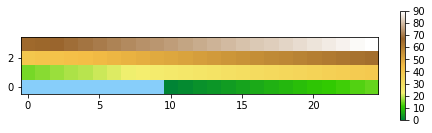

In [9]:
# create array with values from 0 to 99, in 4 rows of 25 values, and display with terrain colormap
arr = np.linspace(0, 100, 100).reshape((4, 25))
 
# create some -ve values
arr = arr - 10


fig = plt.figure(figsize=(8,8))

my_cmap.set_under('lightskyblue')
my_cmap.set_over('white')

mapable = plt.imshow(arr,  cmap=my_cmap, origin='lower', vmin=0, vmax=90)

fig.colorbar(mapable,  shrink=.25)

plt.show()

Using `pcolor` gives a more map-like diagram

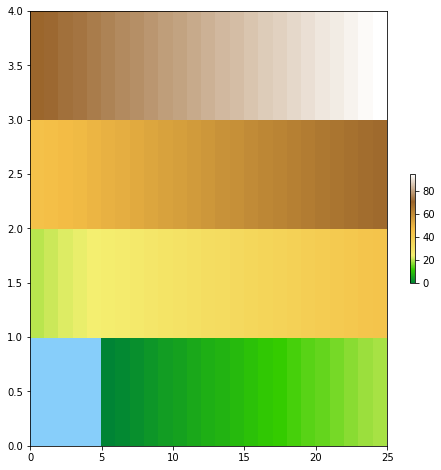

In [10]:
# create array with values from 0 to 99, in 4 rows of 25 values, and display with terrain colormap
arr = np.linspace(0, 100, 100).reshape((4, 25))
 
# create some -ve values
arr = arr - 5


fig = plt.figure(figsize=(8,8))

my_cmap.set_under('lightskyblue')
my_cmap.set_over('white')

mapable = plt.pcolor(arr,  cmap=my_cmap, vmin=0, )

fig.colorbar(mapable,  shrink=.25)

plt.show()

We automate the process of creating a colormap, and setting the out-of-bound colors

In [7]:
def create_land_cmap(fname, cpt_path):
    '''
    create_land_cmap: Create a colormap suitable for maps with a land focus
    
    Parameters:
    fname: String: Name of cpt file (NO EXTENSION; ie "aa", not "aa.cpt")
    
    cpt_path: String: Path to directory holding cpt files: must not end in "/"
    
    Returns:
    Colormap object:  the color of pixels below the Colormap Normalization range
    is set to "lightskyblue", if vmin is set to 0, this can be used for topographic maps
    '''
    dem_dict = get_cpt_cmap(fname, cpt_path)

    my_cmap = matplotlib.colors.LinearSegmentedColormap(fname, dem_dict)
    my_cmap.set_under('lightskyblue')
    my_cmap.set_over('white')
    
    return my_cmap
#end create_land_cmap
    


#### Define a function to download SRTM data from the ESA 

In [11]:
class MySRTMDownloader(SRTMDownloader):
        _SRTM_BASE_URL = ('http://step.esa.int/auxdata/dem/SRTMGL1/')
        
        def url(self, format_dict):
            # override the url method, looking up the url from the
            # ``SRTMDownloader._SRTM_LOOKUP_MASK`` array
            lat = int(format_dict['y'][1:])
            # Change to co-latitude.
            if format_dict['y'][0] == 'N':
                colat = 90 - lat
            else:
                colat = 90 + lat

            lon = int(format_dict['x'][1:4])
            # Ensure positive.
            if format_dict['x'][0] == 'W':
                lon = 360 - lon

            if SRTMDownloader._SRTM_LOOKUP_MASK[lon, colat]:
                return (MySRTMDownloader._SRTM_BASE_URL +
                        u'{y}{x}.SRTMGL{resolution}.hgt.zip').format(**format_dict)
            else:
                return None
            #end if
        #end url
#end MySRTMDownloader

### Define a function to display SRTM data, given a CPT file name

Note that in this function, we linearly spread the colormap between the elevation values 0.1 to 800.
 Other elevation values get the default under- and over-colors.


In [31]:
def show_SRTM_with_colormap(fname, my_cmap, alpha=1.0):
    '''
    show_SRTM_with_colormap: Show a Cartopy map with colormap for sample SRTM data
    
    This is intended to test the visual suitablity of a colormap for relief maps
    
    Parameters:
    fname: String: Name of colormap (used in title)
    
    my_cmap: matplotlib.colors.ColorMap object
    
    alpha: Float: used to set transparency of SRTM relief. Default 1.0
    
    Returns:
    Shows a matplotlib map, with the colormap name, and alpha value in the title
    '''
    # the following variables define temporary and archive file file paths
    default_spec = ('SRTM', 'SRTMGL{resolution}', '{y}{x}.hgt')
    target_path_template = os.path.join('{config[data_dir]}',
                                        *default_spec)
    pre_path_template = os.path.join('{config[pre_existing_data_dir]}',
                                     *default_spec)

    # create a source of SRTM data, using our custom downloader
    source = SRTM1Source(downloader=MySRTMDownloader(target_path_template, pre_path_template)  ) 

    # create a figure of moderate size, declare we are using PlateCarree projection,
    # add the SRTM data source, set the color map used, and the extent (in SE Qld)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    my_alpha = alpha
    ax.add_raster(source, cmap=my_cmap, norm=matplotlib.colors.Normalize(vmin=0.1, vmax=800), alpha=my_alpha)
    ax.set_extent([152.5, 153.5, -27, -26])

    # add a marker for home
    home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
    plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
             alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

    ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

    ax.set_title(f'Using Color Map {fname}, with alpha={my_alpha}', pad=40)

    sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=matplotlib.colors.Normalize(vmin=0.1, vmax=800))
    sm._A = []
    plt.colorbar(sm, shrink=0.5, pad=.1)

    plt.show()
#end show_SRTM_with_colormap

------------------
### DEM_Screen

We display it 'raw', and muted by 50% transparency

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


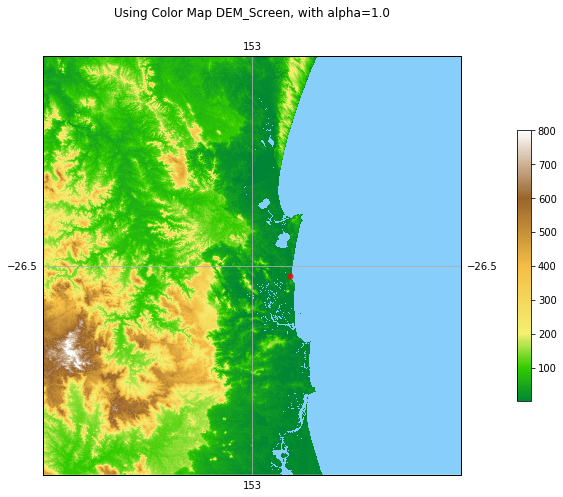

In [32]:
fname = 'DEM_Screen'
cpt_path = 'd:/water/cpt-data/td'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )


D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


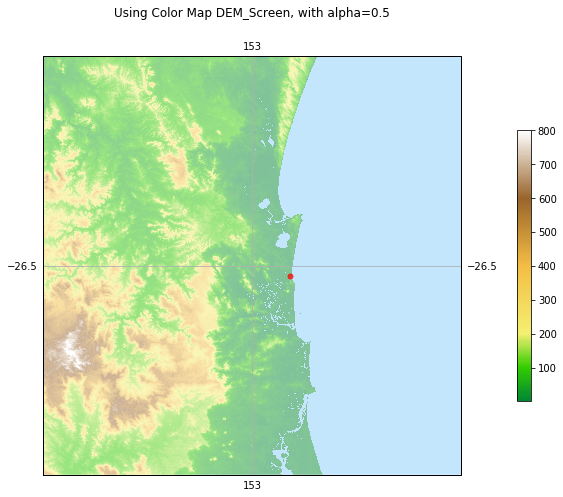

In [33]:
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=0.5 )

----------------------------
### DEM_print
Slightly more muted than the DEM_Screen map

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


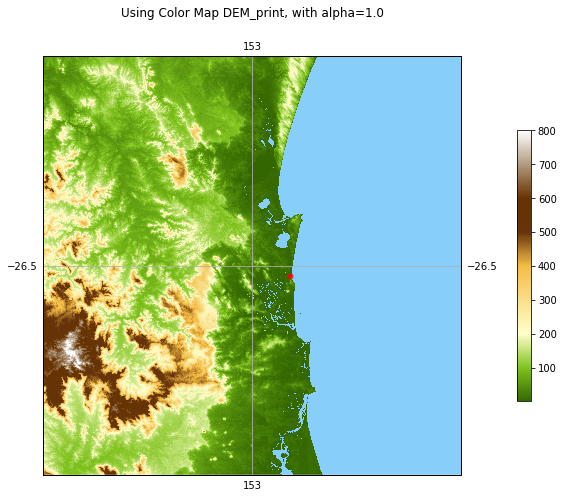

In [34]:
fname = 'DEM_print'
cpt_path = 'd:/water/cpt-data/td'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

### Hypsographic Map

These are based upon the idea that the color used for a particular elevation should depend upon
the typical vegetation at that elevation (and that this can differ between desert and wet areas).

This shows a Hot, Warm colormap

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


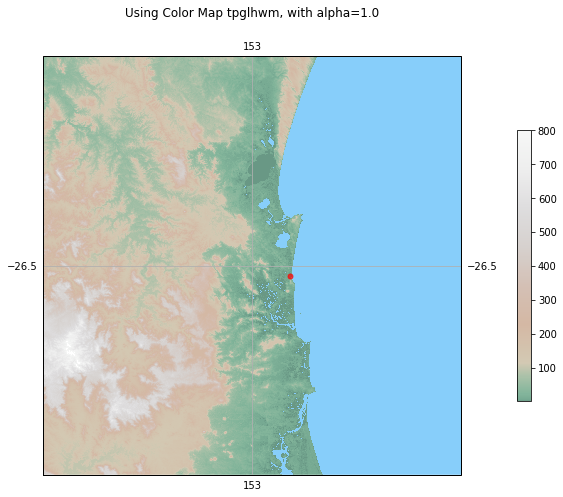

In [35]:
fname = 'tpglhwm'
cpt_path = 'd:/water/cpt-data/tp'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

### Arid Country ColorMap
This example is one used to depict Pakistan; not very appropriate here.

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


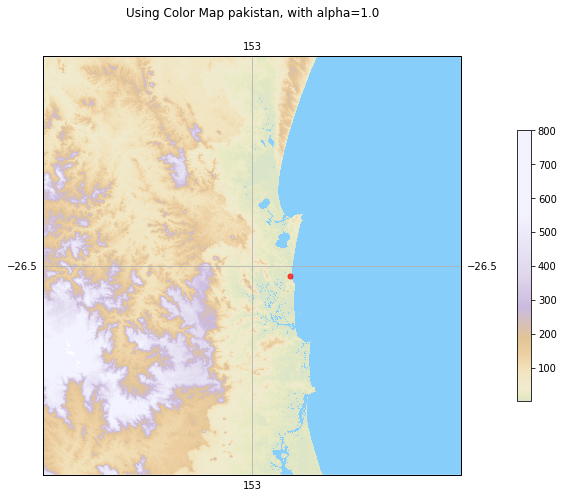

In [38]:
fname='pakistan'
cpt_path = 'D:\Water\cpt-data\wkp\jarke'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

#### Europe-8
Maybe too dark green for Queensland?

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


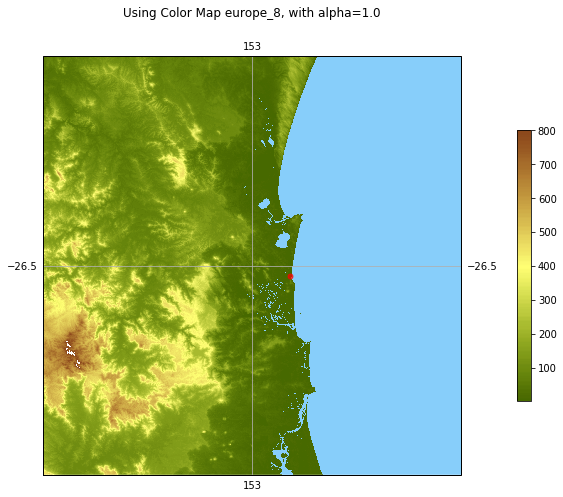

In [41]:
fname='europe_8'
cpt_path = 'D:\Water\cpt-data\esri\hypsometry\eu'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

### Europe-9
Emphasises the ridge tops too much?

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


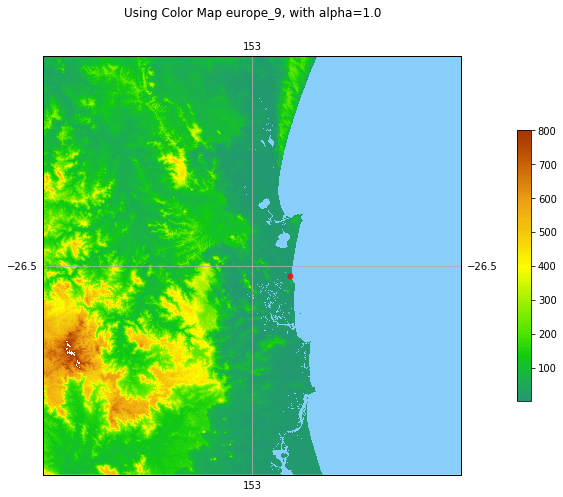

In [42]:
fname='europe_9'
cpt_path = 'D:\Water\cpt-data\esri\hypsometry\eu'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

### Europe-7
Nicely muted.

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


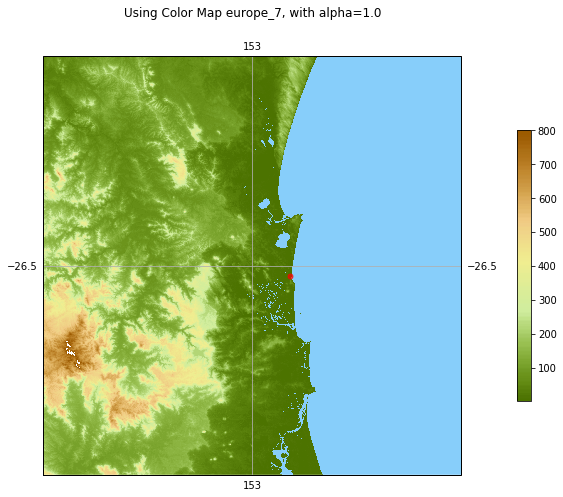

In [43]:
fname='europe_7'
cpt_path = 'D:\Water\cpt-data\esri\hypsometry\eu'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

In [21]:
def show_SRTM_with_stepped_colormap(fname, my_cmap, alpha=1.0):
    '''
    show_SRTM_with_stepped_colormap: Show a Cartopy map with colormap for sample SRTM data
    
    This is intended to test the visual suitablity of a colormap for relief maps.
    
    We use a BoundaryNorm, instead of a continuous gradation Normalize.
    
    Parameters:
    fname: String: Name of colormap (used in title)
    
    my_cmap: matplotlib.colors.ColorMap object
    
    alpha: Float: used to set transparency of SRTM relief. Default 1.0
    
    Returns:
    Shows a matplotlib map, with the colormap name, and alpha value in the title
    '''
    # the following variables define temporary and archive file file paths
    default_spec = ('SRTM', 'SRTMGL{resolution}', '{y}{x}.hgt')
    target_path_template = os.path.join('{config[data_dir]}',
                                        *default_spec)
    pre_path_template = os.path.join('{config[pre_existing_data_dir]}',
                                     *default_spec)

    # create a source of SRTM data, using our custom downloader
    source = SRTM1Source(downloader=MySRTMDownloader(target_path_template, pre_path_template)  ) 

    # create a figure of moderate size, declare we are using PlateCarree projection,
    # add the SRTM data source, set the color map used, and the extent (in SE Qld)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    my_alpha = alpha
    
    my_norm = matplotlib.colors.BoundaryNorm([0.5, 100, 200, 300, 400, 500, 600, 700, 800, 900], 256)
    ax.add_raster(source, cmap=my_cmap, norm=my_norm, alpha=my_alpha)
    ax.set_extent([152.5, 153.5, -27, -26])

    # add a marker for home
    home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
    plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
             alpha=0.7, transform=ccrs.Geodetic(), zorder=5)

    ax.gridlines(draw_labels=True, xlocs=[152, 152.5, 153, 153.5, 154], ylocs=[-27, -26.5, -26, -25.5, -25])

    ax.set_title(f'Using Color Map {fname}, with alpha={my_alpha}', pad=40)

    sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=my_norm)
    sm._A = []
    plt.colorbar(sm, shrink=0.5, pad=.1, extend='both')

    plt.show()
#end show_SRTM_with_stepped_colormap

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


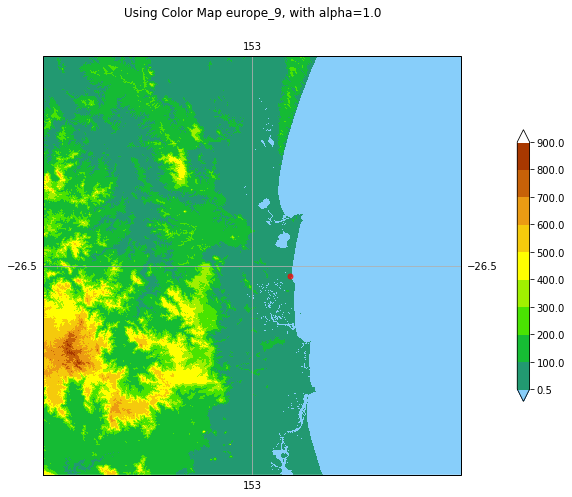

In [22]:
fname='europe_9'
cpt_path = 'D:\Water\cpt-data\esri\hypsometry\eu'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_stepped_colormap(fname, my_cmap=my_cmap, alpha=1.0 )

D:\Anaconda3\envs\root36\lib\site-packages\cartopy\io\srtm.py:416: UserWarning: SRTM requires an account set up and log in to access.use of this class is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access.'


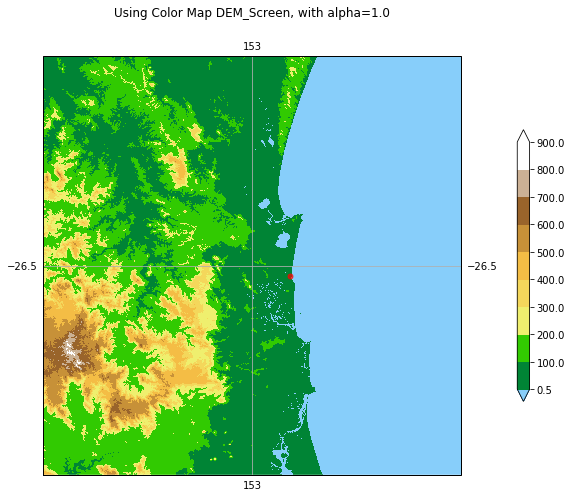

In [23]:
fname = 'DEM_Screen'
cpt_path = 'd:/water/cpt-data/td'

my_cmap = create_land_cmap(fname, cpt_path)
show_SRTM_with_stepped_colormap(fname, my_cmap=my_cmap, alpha=1.0 )